In [1]:
import math
import numpy as np
import scipy
import scipy.optimize
import matplotlib.pyplot as plt
import csv

print 'Done.'

Done.


In [4]:
p1 = polytopes.hypercube(3)
p1 = p1.dilation(3)
#print 'vertices: ', list(p1.vertices())
face_p1 = p1.faces(1)
#print 'edges: ', face_p1
faces = []
for i in range(len(face_p1)):
    faces.append([])
for i in range(len(face_p1)):
    faces[i].append(list(list(face_p1)[i].vertices()[0]))
    faces[i].append(list(list(face_p1)[i].vertices()[1]))
print faces
print 'contains: ', on_edge([-3,-3,0], faces)

[[[-3, -3, -3], [-3, -3, 3]], [[-3, -3, -3], [-3, 3, -3]], [[-3, -3, 3], [-3, 3, 3]], [[-3, 3, -3], [-3, 3, 3]], [[-3, -3, -3], [3, -3, -3]], [[-3, -3, 3], [3, -3, 3]], [[3, -3, -3], [3, -3, 3]], [[-3, 3, -3], [3, 3, -3]], [[3, -3, -3], [3, 3, -3]], [[-3, 3, 3], [3, 3, 3]], [[3, -3, 3], [3, 3, 3]], [[3, 3, -3], [3, 3, 3]]]
contains:  1


In [3]:
def exist(pts, latt):
    latt = np.array(latt)
    for i in range(pts.shape[0]):
        if pts[i][0]==latt[0]:
            if pts[i][1]==latt[1]:
                if pts[i][2]==latt[2]:
                    return 1
    return 0

def face_list(p1):
    face_p1 = p1.faces(1)
    list_face_p1 = list(face_p1)
    faces = []
    for i in range(len(face_p1)):
        faces.append([])
    for i in range(len(face_p1)):
        faces[i].append(list(list_face_p1[i].vertices()[0]))
        faces[i].append(list(list_face_p1[i].vertices()[1]))
    return faces

def dist(p1, p2):
    return sqrt((p1[0]-p2[0])^2+(p1[1]-p2[1])^2+(p1[2]-p2[2])^2)

def on_edge(latt, faces):
    for i in range(len(faces)):
        if (dist(faces[i][0], faces[i][1]) == (dist(faces[i][0], latt) + dist(faces[i][1], latt))):
            #print 'edge: ', faces[i][0], ' and ', faces[i][1]
            #print 'l1: ', dist(faces[i][0], faces[i][1])
            #print 'l2: ', dist(faces[i][0], latt) + dist(faces[i][1], latt)
            return 1
    return 0

def add_lattice(poly):
    pts = []
    vert = list(poly.vertices())
    num_pts = len(vert)
    
    for i in range(num_pts):
        pts.append(list(vert[i]))
        
    pts = np.array(pts)
    pts_max = int(max(np.amax(pts, axis=0)))+1
    pts_new = pts
    
    faces = face_list(poly)
    
    for i in range(-pts_max, pts_max):
        for j in range(-pts_max, pts_max):
            for k in range(-pts_max, pts_max):
                latt = [i,j,k]
                if latt in pts.tolist():
                    continue
                #if poly.contains(latt) == 1 or on_edge(latt, faces) == 1:
                if on_edge(latt, faces) == 1:
                    pts_new = np.append(pts_new, np.array(latt).reshape((1,3)), axis = 0)  
    print 'pts_new: '
    print pts_new
    pts_new = pts_new.tolist()
    #poly_new = PointConfiguration(pts_new)
    poly_new = Polyhedron(vertices = pts_new)
    return poly_new, pts_new
    
poly, pts = add_lattice(p1)

 pts_new: 
[[-3 -3 -3]
 [-3 -3  3]
 [-3  3 -3]
 [-3  3  3]
 [ 3 -3 -3]
 [ 3 -3  3]
 [ 3  3 -3]
 [ 3  3  3]
 [-3 -3 -2]
 [-3 -3 -1]
 [-3 -3  0]
 [-3 -3  1]
 [-3 -3  2]
 [-3 -2 -3]
 [-3 -2  3]
 [-3 -1 -3]
 [-3 -1  3]
 [-3  0 -3]
 [-3  0  3]
 [-3  1 -3]
 [-3  1  3]
 [-3  2 -3]
 [-3  2  3]
 [-3  3 -2]
 [-3  3 -1]
 [-3  3  0]
 [-3  3  1]
 [-3  3  2]
 [-2 -3 -3]
 [-2 -3  3]
 [-2  3 -3]
 [-2  3  3]
 [-1 -3 -3]
 [-1 -3  3]
 [-1  3 -3]
 [-1  3  3]
 [ 0 -3 -3]
 [ 0 -3  3]
 [ 0  3 -3]
 [ 0  3  3]
 [ 1 -3 -3]
 [ 1 -3  3]
 [ 1  3 -3]
 [ 1  3  3]
 [ 2 -3 -3]
 [ 2 -3  3]
 [ 2  3 -3]
 [ 2  3  3]
 [ 3 -3 -2]
 [ 3 -3 -1]
 [ 3 -3  0]
 [ 3 -3  1]
 [ 3 -3  2]
 [ 3 -2 -3]
 [ 3 -2  3]
 [ 3 -1 -3]
 [ 3 -1  3]
 [ 3  0 -3]
 [ 3  0  3]
 [ 3  1 -3]
 [ 3  1  3]
 [ 3  2 -3]
 [ 3  2  3]
 [ 3  3 -2]
 [ 3  3 -1]
 [ 3  3  0]
 [ 3  3  1]
 [ 3  3  2]]


In [154]:
faces = face_list(p1)
print on_edge([0,0,0], faces)

edge:  [-3, -3, -3]  and  [-3, -3, 3]
l1:  6
l2:  6*sqrt(3)
1


In [160]:
face_pts = list(poly.faces(2))
print face_pts

print 'original pts: ', pts
pts_removed = pts
pts_save = np.array(pts)

remove_pt = list(face_pts[0].vertices()[0])
pts_removed.remove(remove_pt)
print 'removed pts: ', pts_removed

pts = pts_save.tolist()

poly_new = Polyhedron(vertices = pts_removed)
face_new = list(poly_new.faces(2))
print 'new vertices: ', poly_new.vertices()

[<1,2,3,4>, <1,3,5,6>, <0,3,4,6>, <0,2,4,7>, <0,5,6,7>, <1,2,5,7>]
original pts:  [[-3, -3, -3], [-3, -3, 3], [-3, 3, -3], [-3, 3, 3], [3, -3, -3], [3, -3, 3], [3, 3, -3], [3, 3, 3], [-3, -3, -2], [-3, -3, -1], [-3, -3, 0], [-3, -3, 1], [-3, -3, 2], [-3, -2, -3], [-3, -2, 3], [-3, -1, -3], [-3, -1, 3], [-3, 0, -3], [-3, 0, 3], [-3, 1, -3], [-3, 1, 3], [-3, 2, -3], [-3, 2, 3], [-3, 3, -2], [-3, 3, -1], [-3, 3, 0], [-3, 3, 1], [-3, 3, 2], [-2, -3, -3], [-2, -3, 3], [-2, 3, -3], [-2, 3, 3], [-1, -3, -3], [-1, -3, 3], [-1, 3, -3], [-1, 3, 3], [0, -3, -3], [0, -3, 3], [0, 3, -3], [0, 3, 3], [1, -3, -3], [1, -3, 3], [1, 3, -3], [1, 3, 3], [2, -3, -3], [2, -3, 3], [2, 3, -3], [2, 3, 3], [3, -3, -2], [3, -3, -1], [3, -3, 0], [3, -3, 1], [3, -3, 2], [3, -2, -3], [3, -2, 3], [3, -1, -3], [3, -1, 3], [3, 0, -3], [3, 0, 3], [3, 1, -3], [3, 1, 3], [3, 2, -3], [3, 2, 3], [3, 3, -2], [3, 3, -1], [3, 3, 0], [3, 3, 1], [3, 3, 2]]
removed pts:  [[-3, -3, -3], [-3, -3, 3], [-3, 3, -3], [-3, 3, 3], [3, -3

In [147]:
print face_new
poly_new.plot().save("plot1.png")

[<0,1,2>, <1,2,3,4>, <0,2,3,5>, <0,1,6>, <1,4,6>, <0,5,6>, <3,4,5,6>]


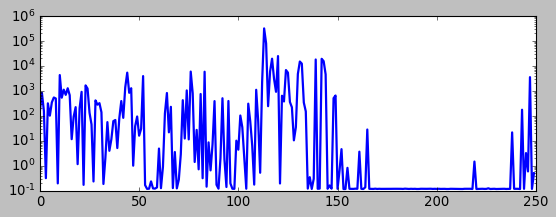

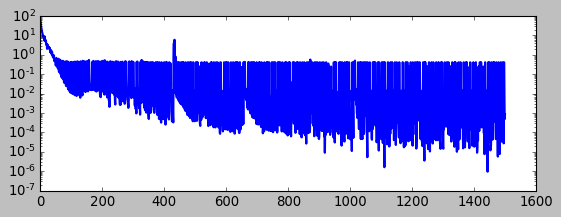

In [16]:
import matplotlib.pyplot as plt
from matplotlib import pyplot

loss_test_path = 'pointnet-master/log/test/loss_test.txt'
loss_train_path = 'pointnet-master/log/train/loss_train.txt'
loss_test = open(loss_test_path, 'r')
loss_train = open(loss_train_path, 'r')
test = [eval(line) for line in loss_test]
train = [eval(line) for line in loss_train]
len_test = len(test)
len_train = len(train)

#a = [ pow(10,i) for i in range(10) ]
pyplot.subplot(2,1,1)
pyplot.plot(test, color='blue', lw=2)
pyplot.yscale('log')
pyplot.show()

pyplot.subplot(2,1,1)
pyplot.plot(train, color='blue', lw=2)
pyplot.yscale('log')
pyplot.show()

In [2]:
SIDE_LENGTH = 3
print 'output/vol/cube/failed/%dx%d_failed.txt' % (SIDE_LENGTH, SIDE_LENGTH)
fail_out = open('output/vol/cube/failed/%dx%d_failed.txt' % (SIDE_LENGTH, SIDE_LENGTH), 'w')

output/vol/cube/failed/3x3_failed.txt


In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math

def func(x,y,z):
    v = -(y - z)*(-x*z/sqrt(-85**(1/4)*sqrt(z) + 85) + y**2/((-sqrt(85)*x*sqrt(y - y/z + 6)/85 + sqrt(y - sqrt(z)))*(-x*z/((x + 60)**(1/4) + (x - y)*(-sqrt(85)*x*z**2/85 + x - sqrt(z) - 74)/(y**2 - sqrt(85))) - sqrt(y + 3))))/y
    return v

test_path = '/home/carnd/CYML/machine_learning/symbolic_regression/SoRa-master/test_modifydata/lift_1_to_50/test_1.csv'
test_file = open(test_path, 'r')
counter = 0
err_counter = 1
diff_max = 0
line = 0
x = y = z = v = test = 0.0
data = []
test_x = []
test_y = []
test_z = []
diff_list = []
err_list = []
outlier = []
verb = 0

for line in test_file:
#     if counter >= 10:
#         break
#     sel = np.random.randint(2)
#     if sel == 0:
#         continue
    try:
        if verb == 1:
            print 'raw data: ', line
        data = eval(line)
    except:
        continue
    test = float(data[1])
    if test <= 0:
        continue
    test = 1/test
    x = data[0]
    y = data[1]
    z = data[2]
    try:
        v = float(func(x,y,z))
    except:
        if verb == 1:
            print 'Error case number ', err_counter, ': ', data
        err_list.append(list(data))
        err_counter += 1
        continue
    diff = abs(test - v)
    if diff > 100:
        outlier.append([x, y, z, v, test])
        continue
    test_x.append(x)
    test_y.append(y)
    test_z.append(z)
    diff_list.append(diff)
#     counter += 1
    if verb == 1:
        print 'x: ', x, " y: ", y, " z: ", z, " pred: ", v, " test: ", test
        print 'diff_list: ', diff_list
        print 'num_x: ', len(test_x), ' num_y: ', len(test_y), ' num_z: ', len(test_z), ' num_diff: ', len(diff_list)

try:
    test_file.close()
except:
    pass
print 'num_x: ', len(test_x), ' num_y: ', len(test_y), ' num_z: ', len(test_z), ' num_diff: ', len(diff_list), 'max_diff: ', max(diff_list)
print 'Done.'
# for group in outlier:
#     x = group[0]
#     y = group[1]
#     z = group[2]
#     test = group[3]
#     print 'x: ', x, '     y: ', y, '     predict: ', z, '     truth: ', test

num_x:  828  num_y:  828  num_z:  828  num_diff:  828 max_diff:  90.8174892562
Done.


Done.


In [138]:
import sympy as sp
x = sp.Symbol('x')
y = sp.Symbol('y')
z = sp.Symbol('z')
eq = 'y + z + (46*x - sqrt(z) + z + 277 + (x**2 + 2*x - 11*z - 84)/(sqrt(x) - x + 0.454545454545455))/(-x*sqrt(y) + sqrt(33) + y/x) + 61*sqrt(93)*(1 + sqrt(61))*(-sqrt(z) + 2*sqrt(3))*(z - 45)/(y**2*sqrt(z)*(-x**2 + z*(x + y)))'
eq_m = sp.latex(eval(eq))
print eq_m

y + z + \frac{1}{- x \sqrt{y} + \sqrt{33} + \frac{y}{x}} \left(46 x - \sqrt{z} + z + 277 + \frac{x^{2} + 2 x - 11 z - 84}{\sqrt{x} - x + 0.454545454545455}\right) - \frac{61 \sqrt{93} \left(1 + \sqrt{61}\right) \left(- \sqrt{z} + 2 \sqrt{3}\right) \left(z - 45\right)}{y^{2} \sqrt{z} \left(x^{2} - z \left(x + y\right)\right)}


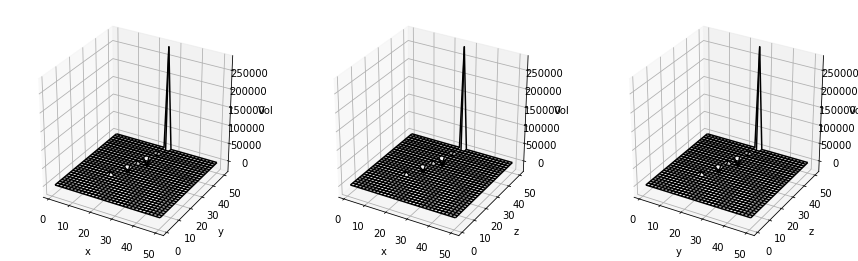

In [4]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,15))
x = np.linspace(1, 50, 30)
y = np.linspace(1, 50, 30)
z = np.linspace(1, 50, 30)
ax = fig.add_subplot(3,3,1,projection='3d')
X, Y = np.meshgrid(x, y)
V = func(X, Y, 1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Vol')
ax.plot_wireframe(X, Y, V, color='black')

ax = fig.add_subplot(3,3,2,projection='3d')
X, Z = np.meshgrid(x, z)
V = func(X, Z, 1)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('Vol')
ax.plot_wireframe(X, Z, V, color='black')

ax = fig.add_subplot(3,3,3,projection='3d')
Y, Z = np.meshgrid(y, z)
V = func(Y, Z, 1)
ax.set_xlabel('y')
ax.set_ylabel('z')
ax.set_zlabel('Vol')
ax.plot_wireframe(Y, Z, V, color='black')

plt.show()

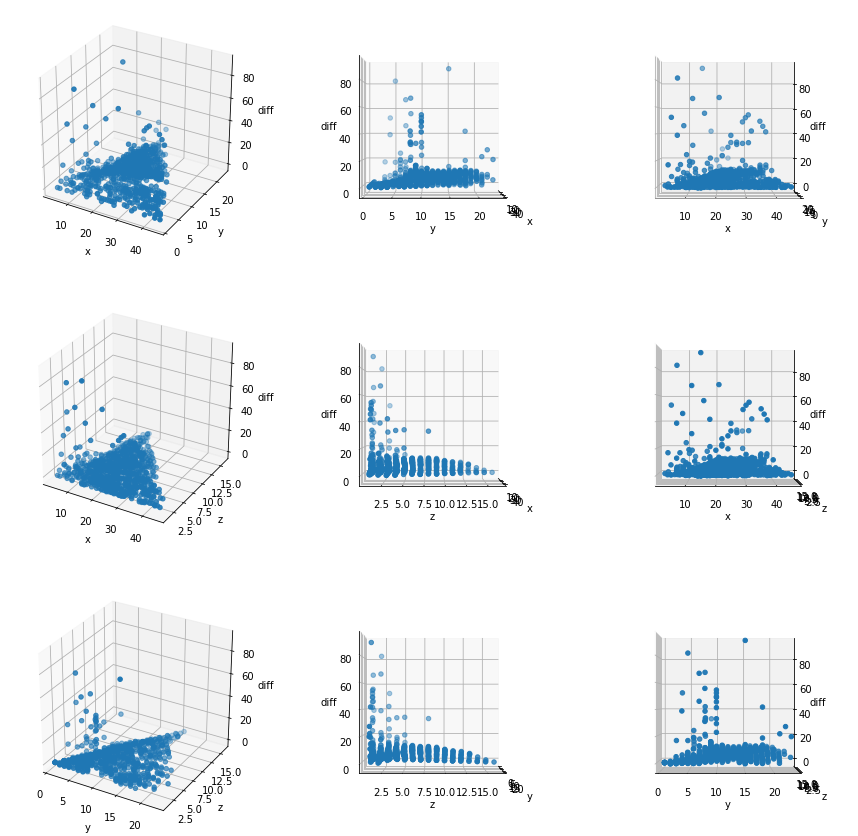

In [4]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,15))
# ax = Axes3D(fig)
ax = fig.add_subplot(3, 3, 1, projection='3d')
ax.scatter(test_x, test_y, diff_list)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('diff')
ax = fig.add_subplot(3, 3, 2, projection='3d')
ax.scatter(test_x, test_y, diff_list)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('diff')
ax.view_init(0,0)
ax = fig.add_subplot(3, 3, 3, projection='3d')
ax.scatter(test_x, test_y, diff_list)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('diff')
ax.view_init(0,-90)

ax = fig.add_subplot(3, 3, 4, projection='3d')
ax.scatter(test_x, test_z, diff_list)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('diff')
ax = fig.add_subplot(3, 3, 5, projection='3d')
ax.scatter(test_x, test_z, diff_list)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('diff')
ax.view_init(0,0)
ax = fig.add_subplot(3, 3, 6, projection='3d')
ax.scatter(test_x, test_z, diff_list)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('diff')
ax.view_init(0,-90)

ax = fig.add_subplot(3, 3, 7, projection='3d')
ax.scatter(test_y, test_z, diff_list)
ax.set_xlabel('y')
ax.set_ylabel('z')
ax.set_zlabel('diff')
ax = fig.add_subplot(3, 3, 8, projection='3d')
ax.scatter(test_y, test_z, diff_list)
ax.set_xlabel('y')
ax.set_ylabel('z')
ax.set_zlabel('diff')
ax.view_init(0,0)
ax = fig.add_subplot(3, 3, 9, projection='3d')
ax.scatter(test_y, test_z, diff_list)
ax.set_xlabel('y')
ax.set_ylabel('z')
ax.set_zlabel('diff')
ax.view_init(0,-90)

plt.show()

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(test_y, test_z, diff_list)
ax.set_xlabel('y')
ax.set_ylabel('z')
ax.set_zlabel('diff')
plt.show()

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(test_y, test_z, diff_list)
ax.set_xlabel('y')
ax.set_ylabel('z')
ax.set_zlabel('diff')
plt.show()

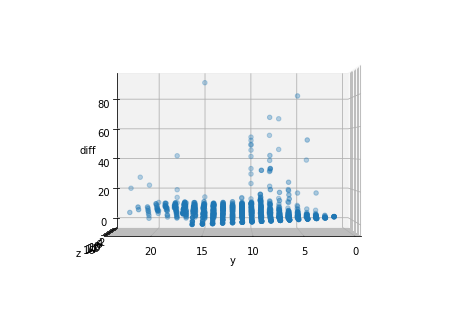

In [64]:
ax.view_init(0,90)
fig

In [3]:
import numpy as np
import math
import random

input_file = open('output/train/cylinder/lift_1_40.txt', 'r')

train_1 = '/home/carnd/CYML/machine_learning/symbolic_regression/SoRa-master/test_modifydata/tri_1_to_50_2/train_1.csv'
test_1 = '/home/carnd/CYML/machine_learning/symbolic_regression/SoRa-master/test_modifydata/tri_1_to_50_2/test_1.csv'
set1 = [train_1, test_1]
train_2 = '/home/carnd/CYML/machine_learning/symbolic_regression/SoRa-master/test_modifydata/tri_1_to_50_2/train_2.csv'
test_2 = '/home/carnd/CYML/machine_learning/symbolic_regression/SoRa-master/test_modifydata/tri_1_to_50_2/test_2.csv'
set2 = [train_2, test_2]
train_3 = '/home/carnd/CYML/machine_learning/symbolic_regression/SoRa-master/test_modifydata/tri_1_to_50_2/train_3.csv'
test_3 = '/home/carnd/CYML/machine_learning/symbolic_regression/SoRa-master/test_modifydata/tri_1_to_50_2/test_3.csv'
set3 = [train_3, test_3]
train_4 = '/home/carnd/CYML/machine_learning/symbolic_regression/SoRa-master/test_modifydata/tri_1_to_50_2/train_4.csv'
test_4 = '/home/carnd/CYML/machine_learning/symbolic_regression/SoRa-master/test_modifydata/tri_1_to_50_2/test_4.csv'
set4 = [train_4, test_4]
train_5 = '/home/carnd/CYML/machine_learning/symbolic_regression/SoRa-master/test_modifydata/tri_1_to_50_2/train_5.csv'
test_5 = '/home/carnd/CYML/machine_learning/symbolic_regression/SoRa-master/test_modifydata/tri_1_to_50_2/test_5.csv'
set5 = [train_5, test_5]

output_sets = [set1, set2, set3, set4, set5]
num_sets = len(output_sets)
print 'number of output sets: ', num_sets
data_set = []
data_dict = {}

for line in input_file:
    data = eval(line)
    h1 = int(data[0][0])
    h2 = int(data[0][1])
    h3 = int(data[0][2])
    vol = float(data[1])
    if vol <= 0:
        continue
    vol = 1/vol
    # check if x,y is already in the dict
    key = '%d_%d_%d' % (h1,h2,h3)
    try:
        val = data_dict[key]
        if abs(val - vol) > 0.0001:
            print 'Conflict value error'
            print 'key: ', key
            print ' dict val: ', val, ' vol: ', vol
            h = max([h1,h2,h3])
            upper = 16.0/27/h
            lower = 16.0/27/(h+1)
            check0 = 0
            check1 = 0
            if 1/vol < upper and 1/vol > lower:
                check0 = 1
            if 1/val < upper and 1/val > lower:
                check1 = 1
            if check0 == 1 and check1 == 0:
                print '10'
                data_dict[key] = vol
                continue
            elif check1 == 1 and check0 == 0:
                print '01'
                data_dict[key] = val
                continue
            else:
                dist0 = abs(upper - 1/vol)
                dist1 = abs(upper - 1/val)
                if dist0 < dist1:
                    print 'vol is closer'
                    data_dict[key] = vol
                    continue
                else:
                    print 'val is closer'
                    data_dict[key] = val
                    continue
            val_min = min(val, vol)
            data_dict[key] = val_min
            print 'Replace val with val_min: ', val_min
        continue
    except:
        data_dict[key] = vol
        data_set.append([h1,h2,h3,vol])

input_file.close()
print 'sample data: ', data_set[10]
num_data = len(data_set)
num_train = int(0.75*num_data)
num_test = num_data - num_train
print 'total number of data: ', num_data
print 'number of train: ', num_train
print 'number of test: ', num_test

number of output sets:  5
Conflict value error
key:  36_0_0
 dict val:  60.5950433255  vol:  54.8726953468
val is closer
Conflict value error
key:  36_1_0
 dict val:  27.8380936473  vol:  39.7677563032
vol is closer
Conflict value error
key:  36_1_1
 dict val:  30.0156081162  vol:  37.6010528295
vol is closer
Conflict value error
key:  36_2_0
 dict val:  54.6687076318  vol:  53.6078052965
val is closer
Conflict value error
key:  36_2_1
 dict val:  30.1568154403  vol:  30.1322807123
val is closer
Conflict value error
key:  36_2_2
 dict val:  27.2702481593  vol:  21.8207209566
val is closer
Conflict value error
key:  36_3_0
 dict val:  93.8438438438  vol:  37.5657400451
val is closer
Conflict value error
key:  36_3_1
 dict val:  85.85901949  vol:  57.1297989031
vol is closer
Conflict value error
key:  36_3_2
 dict val:  34.0274942153  vol:  23.8743255503
val is closer
Conflict value error
key:  36_4_0
 dict val:  68.8041832943  vol:  58.5651537335
vol is closer
Conflict value error
key: 

In [4]:
for i in range(num_sets):
    random.shuffle(data_set)
    train_data = data_set[:num_train]
    test_data = data_set[num_train:]
    out_set = output_sets[i]
    train_file = open(out_set[0],'w')
    test_file = open(out_set[1],'w')
    train_file.write('x,y,z,v\n')
    for data in train_data:
        x = data[0]
        y = data[1]
        z = data[2]
        v = data[3]
        train_file.write('%f,%f,%f,%f\n' % (float(x),float(y),float(z),float(v)))
    print 'train set ', i+1, ' completed'
    test_file.write('x,y,z\n')
    for data in test_data:
        x = data[0]
        y = data[1]
        z = data[2]
        v = data[3]
        train_file.write('%f,%f,%f,%f\n' % (float(x),float(y),float(z),float(v)))
    print 'test set ', i+1, ' completed'
    print ''
    train_file.close()
    test_file.close()

print 'Done.'

train set  1  completed
test set  1  completed

train set  2  completed
test set  2  completed

train set  3  completed
test set  3  completed

train set  4  completed
test set  4  completed

train set  5  completed
test set  5  completed

Done.


In [1]:
import numpy as np
import math
import random

input_file = open('output/train/cylinder/lift_1_to_50.txt', 'r')
data_set = []
data_dict = {}

for line in input_file:
    data = eval(line)
    x = float(data[0][0])
    y = float(data[0][1])
    z = float(data[0][2])
    vol = float(data[1])
    if vol <= 0:
        continue
    vol = 1/vol
    # check if x,y,z is already in the dict
    key = '%d_%d_%d' % (int(x), int(y), int(z))
    try:
        val = data_dict[key]
        if abs(val - vol) > 0.0001:
            print 'Conflict value error'
            print 'key: ', key
            print ' dict val: ', val, ' vol: ', vol
            val_min = min(val, vol)
            data_dict[key] = val_min
            print 'Replace val with val_min: ', val_min
        continue
    except:
        data_dict[key] = vol
        data_set.append([x,y,z,vol])

print 'sample data: ', data_set[10]
num_data = len(data_set)
num_train = int(0.75*num_data)
num_test = num_data - num_train
print 'total number of data: ', num_data
print 'number of train: ', num_train
print 'number of test: ', num_test

sample data:  [2.0, 2.0, 1.0, 5.092433830533989]
total number of data:  4013
number of train:  3009
number of test:  1004


In [2]:
train_1 = '/home/carnd/CYML/machine_learning/symbolic_regression/SoRa-master/test_modifydata/lift_1_to_50/train_1.csv'
test_1 = '/home/carnd/CYML/machine_learning/symbolic_regression/SoRa-master/test_modifydata/lift_1_to_50/test_1.csv'
set1 = [train_1, test_1]
train_2 = '/home/carnd/CYML/machine_learning/symbolic_regression/SoRa-master/test_modifydata/lift_1_to_50/train_2.csv'
test_2 = '/home/carnd/CYML/machine_learning/symbolic_regression/SoRa-master/test_modifydata/lift_1_to_50/test_2.csv'
set2 = [train_2, test_2]
train_3 = '/home/carnd/CYML/machine_learning/symbolic_regression/SoRa-master/test_modifydata/lift_1_to_50/train_3.csv'
test_3 = '/home/carnd/CYML/machine_learning/symbolic_regression/SoRa-master/test_modifydata/lift_1_to_50/test_3.csv'
set3 = [train_3, test_3]
train_4 = '/home/carnd/CYML/machine_learning/symbolic_regression/SoRa-master/test_modifydata/lift_1_to_50/train_4.csv'
test_4 = '/home/carnd/CYML/machine_learning/symbolic_regression/SoRa-master/test_modifydata/lift_1_to_50/test_4.csv'
set4 = [train_4, test_4]
train_5 = '/home/carnd/CYML/machine_learning/symbolic_regression/SoRa-master/test_modifydata/lift_1_to_50/train_5.csv'
test_5 = '/home/carnd/CYML/machine_learning/symbolic_regression/SoRa-master/test_modifydata/lift_1_to_50/test_5.csv'
set5 = [train_5, test_5]

output_sets = [set1, set2, set3, set4, set5]
num_sets = len(output_sets)
print 'number of output sets: ', num_sets

for i in range(num_sets):
    random.shuffle(data_set)
    train_data = data_set[:num_train]
    test_data = data_set[num_train:]
    out_set = output_sets[i]
    train_file = open(out_set[0],'w')
    test_file = open(out_set[1],'w')
    train_file.write('x,y,z,v\n')
    for data in train_data:
        x = data[0]
        y = data[1]
        z = data[2]
        v = data[3]
        train_file.write('%f,%f,%f,%f\n' % (float(x),float(y),float(z),float(v)))
    train_file.close()
    print 'train set ', i+1, ' completed'
    test_file.write('x,y,z,v\n')
    for data in test_data:
        x = data[0]
        y = data[1]
        z = data[2]
        v = data[3]
        test_file.write('%f,%f,%f,%f\n' % (float(x),float(y),float(z),float(v)))
    test_file.close()
    print 'test set ', i+1, ' completed'
    print ''

print 'Done.'

number of output sets:  5
train set  1  completed
test set  1  completed

train set  2  completed
test set  2  completed

train set  3  completed
test set  3  completed

train set  4  completed
test set  4  completed

train set  5  completed
test set  5  completed

Done.


In [7]:
import numpy as np
import math
import random

input_file = open('output/train/cylinder/lift_1_40.txt', 'r')
data_set = []
data_dict = {}
y_list = []
z_list = []
vol_list = []
count_list = np.zeros(45)
count_list = count_list.tolist()

for line in input_file:
    data = eval(line)
    x = float(data[0][0])
    y = float(data[0][1])
    z = float(data[0][2])
    vol = float(data[1])
    if vol <= 0:
        print 'nah'
        continue
    count_list[int(x)] += 1
    vol = 1/vol
    y_list.append(y)
    z_list.append(z)
    vol_list.append(vol)

print 'count_list: ', count_list
print 'Done.'

count_list:  [0.0, 3.0, 6.0, 10.0, 15.0, 21.0, 28.0, 36.0, 45.0, 55.0, 66.0, 78.0, 91.0, 105.0, 120.0, 136.0, 153.0, 171.0, 190.0, 210.0, 231.0, 253.0, 276.0, 300.0, 325.0, 351.0, 378.0, 406.0, 435.0, 7.0, 0.0, 528.0, 561.0, 595.0, 685.0, 666.0, 743.0, 945.0, 0.0, 227.0, 0.0, 55.0, 0.0, 0.0, 0.0]
Done.


x_list = np.arange(45)
x_list = x_list.tolist()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_list, count_list)
ax.set_xlabel('x_list')
ax.set_ylabel('count')
plt.show()

In [7]:
import numpy as np
import math
import random

input_file = open('output/train/cylinder/lift_1_to_50.txt', 'r')
data_set = []
data_dict = {}
y_list = []
z_list = []
vol_list = []
count_list = np.zeros(51)
count_list = count_list.tolist()
err_list = []

for line in input_file:
    data = eval(line)
    x = float(data[0][0])
    if x != 5:
        continue
    y = float(data[0][1])
    z = float(data[0][2])
    vol = float(data[1])
    if vol <= 0:
        continue
#     vol = 1/vol
    if z > 4 and vol > 0.2:
        err_list.append([x,y,z,vol])
    y_list.append(y)
    z_list.append(z)
    vol_list.append(vol)

print 'count_list: ', len(y_list)
print 'len y_list: ', len(y_list)
print 'error: ', err_list
print 'Done.'

count_list:  21
len y_list:  21
error:  [[5.0, 5.0, 5.0, 0.24373739978920878]]
Done.


In [8]:
1/0.24373739978920878

4.102776188081227

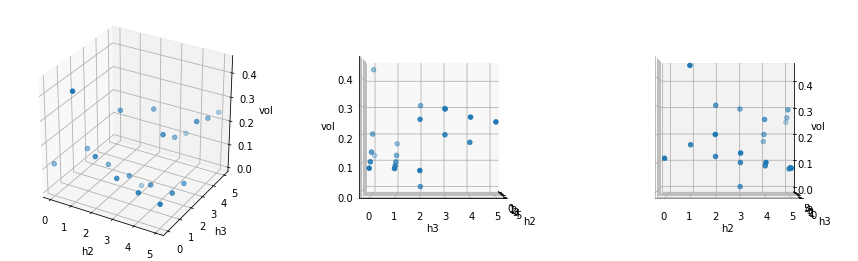

In [5]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(3, 3, 1, projection='3d')
ax.scatter(y_list, z_list, vol_list)
ax.set_xlabel('h2')
ax.set_ylabel('h3')
ax.set_zlabel('vol')

ax = fig.add_subplot(3, 3, 2, projection='3d')
ax.scatter(y_list, z_list, vol_list)
ax.set_xlabel('h2')
ax.set_ylabel('h3')
ax.set_zlabel('vol')
ax.view_init(0,0)

ax = fig.add_subplot(3, 3, 3, projection='3d')
ax.scatter(y_list, z_list, vol_list)
ax.set_xlabel('h2')
ax.set_ylabel('h3')
ax.set_zlabel('vol')
ax.view_init(0,-90)

plt.show()